In [1]:
%load_ext autoreload
%autoreload 2

## Сделал:

Разметил данные (параметры - n, thresh - длина прогноза и порог чувствительности)

Запустил RF на данных, результат акураси - 0.3, то есть случайное блуждание


## Сделать:

автоматически подбирать thresh, чтобы классы были сбалансированны или как-то еще

выбирать thresh в процентах, а не абсолютных значениях

запустить RF на окне определенной длины (длина - гиперпараметр)


In [2]:
import numpy as np
import pandas as pd
import os
import sys

In [3]:
sys.path.append('../')

In [82]:
def get_label_by_diff(d, thresh=2.3):
    if d > thresh:
        return 'sell'
    if d < -thresh:
        return 'buy'
    return 'hold'

In [90]:
def make_labels(df, column, n=10, thresh=2):
    df.loc[:, 'target'] = df[column]
    df = df[['target']]
    df.loc[:, 'diff'] = df.target.diff(n)
    df.loc[:, 'label'] = df['diff'].apply(lambda x: get_label_by_diff(x, thresh))
    return df

In [91]:
df = pd.read_csv('../data/processed/all.csv', index_col=0, parse_dates=True)
df = make_labels(df, 'CL=F Close')

C:\Anaconda\envs\dev\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\dev\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Anaconda\envs\dev\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

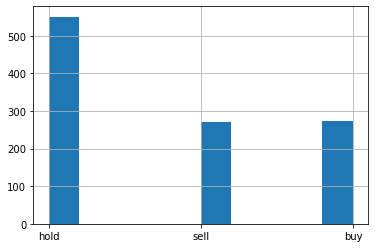

In [92]:
df.label.hist()

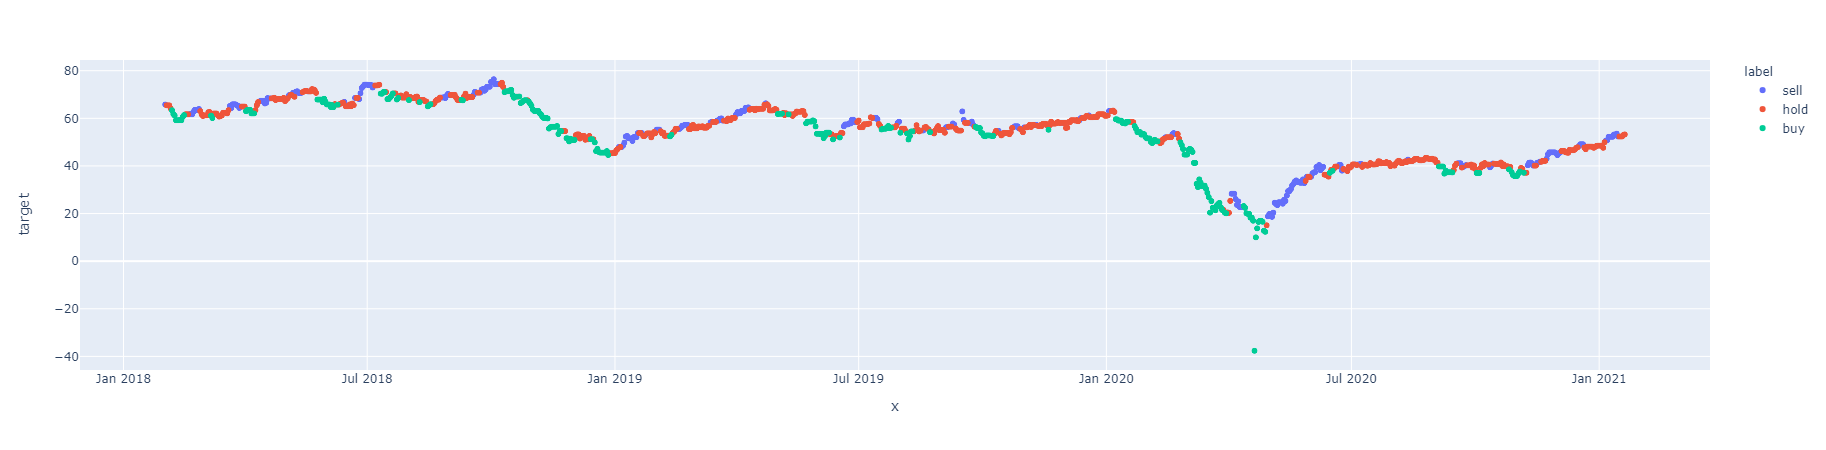

In [93]:
import plotly.express as px

fig = px.scatter(df.dropna(), x=df.dropna().index, y="target", color='label')
fig.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier

In [95]:
pivot = int(len(df) * 0.9)
train = df[:pivot]
test = df[pivot:]

In [118]:
X_train, X_test = train.target.to_numpy().reshape(-1, 1), test.target.to_numpy().reshape(-1, 1)
Y_train, Y_test = train.label, test.label
model = RandomForestClassifier(300)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=300)

In [119]:
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy_score(y_pred, Y_test)

0.3

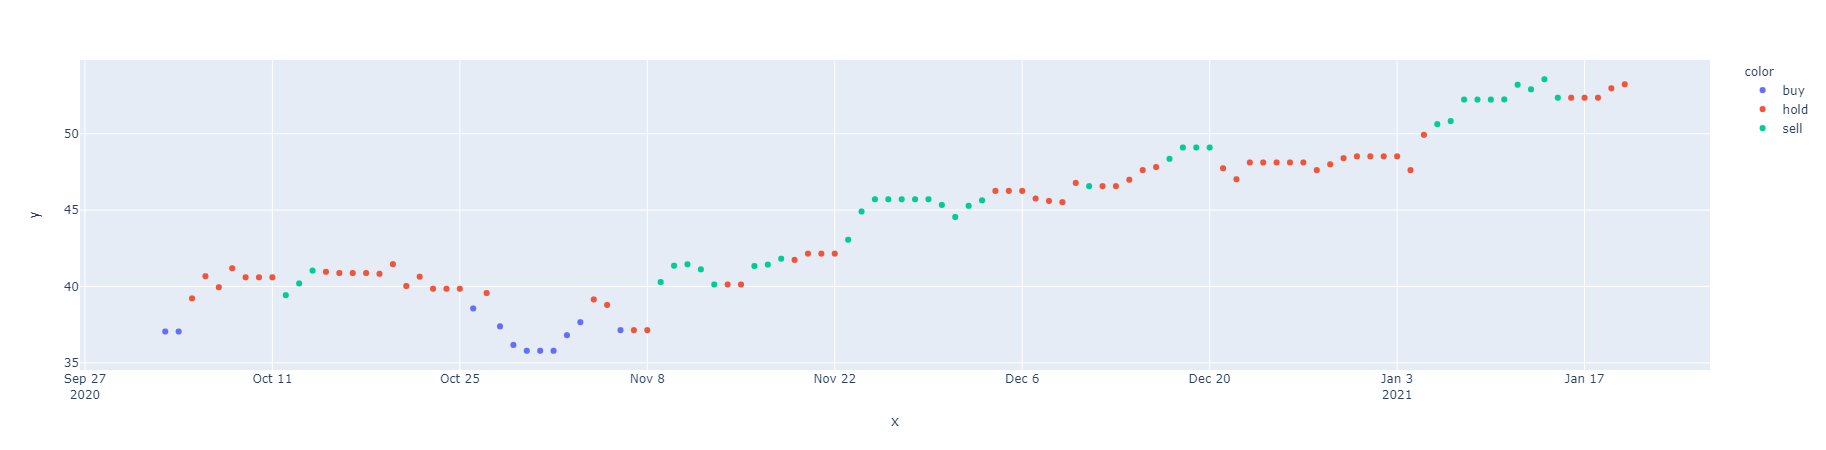

In [122]:
fig = px.scatter(x=test.index, y=test.target, color=Y_test)
fig.show()

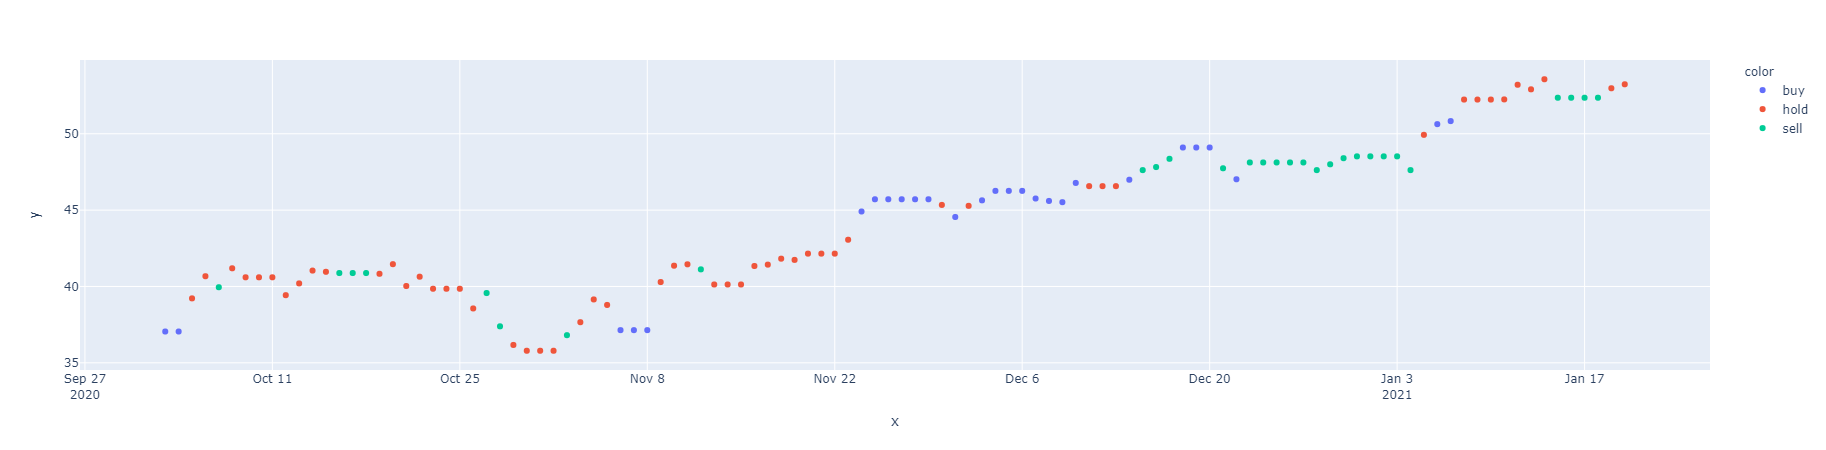

In [123]:
fig = px.scatter(x=test.index, y=test.target, color=y_pred)
fig.show()